In [ ]:
#Classes are as listed below:
#– ( 0, b’Speed limit (20km/h)‘) ( 1, b’Speed limit (30km/h)’)
#– ( 2, b’Speed limit (50km/h)‘) ( 3, b’Speed limit (60km/h)’)
#– ( 4, b’Speed limit (70km/h)‘) ( 5, b’Speed limit (80km/h)’)
#– ( 6, b’End of speed limit (80km/h)‘) ( 7, b’Speed limit (100km/h)’)
#– ( 8, b’Speed limit (120km/h)‘) ( 9, b’No passing’)
#– (10, b’No passing for vehicles over 3.5 metric tons’)
#– (11, b’Right-of-way at the next intersection’) (12, b’Priority road’)
#– (13, b’Yield’) (14, b’Stop’) (15, b’No vehicles’)
#– (16, b’Vehicles over 3.5 metric tons prohibited’) (17, b’No entry’)
#– (18, b’General caution’) (19, b’Dangerous curve to the left’)
#– (20, b’Dangerous curve to the right’) (21, b’Double curve’)
#– (22, b’Bumpy road’) (23, b’Slippery road’)
#– (24, b’Road narrows on the right’) (25, b’Road work’)
#– (26, b’Traffic signals’) (27, b’Pedestrians’) (28, b’Children crossing’)
#– (29, b’Bicycles crossing’) (30, b’Beware of ice/snow’)
#– (31, b’Wild animals crossing’)
#– (32, b’End of all speed and passing limits’) (33, b’Turn right ahead’)
#– (34, b’Turn left ahead’) (35, b’Ahead only’) (36, b’Go straight or right’)
#– (37, b’Go straight or left’) (38, b’Keep right’) (39, b’Keep left’)
#– (40, b’Roundabout mandatory’) (41, b’End of no passing’)
#– (42, b’End of no passing by vehicles over 3.5 metric tons’)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import libraries
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [ ]:
# The pickle module implements binary protocols for serializing and␣
#↪de-serializing a Python object structure.
with open("train.p", mode='rb') as training_data:
  train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
  valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
  test = pickle.load(testing_data)

In [ ]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
X_train.shape


(34799, 32, 32, 3)

In [ ]:
y_train.shape


(34799,)

36

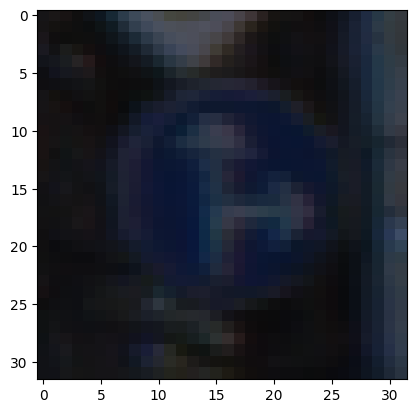

In [ ]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]


In [ ]:
## Shuffle the dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)

In [ ]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [ ]:
X_train_gray.shape

(34799, 32, 32, 1)

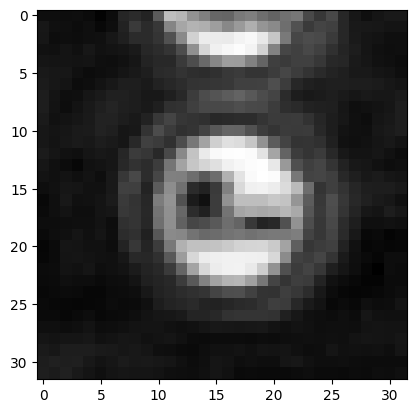

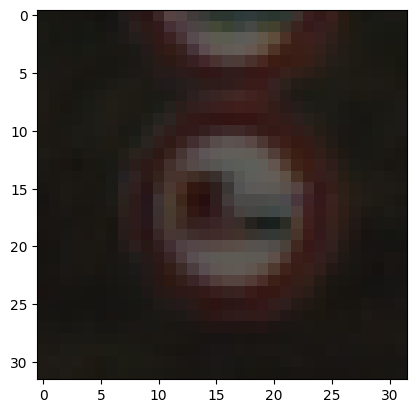

In [ ]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

In [ ]:
# Import train_test_split from scikit library
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense,Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

In [ ]:
image_shape = X_train_gray[i].shape

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu',input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())
cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())
cnn_model.add(Flatten())
cnn_model.add(Dense(units=120, activation='relu'))
cnn_model.add(Dense(units=84, activation='relu'))
cnn_model.add(Dense(units=43, activation = 'softmax'))

In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [ ]:
history = cnn_model.fit(X_train_gray_norm,
y_train,
batch_size=500,
epochs=10,
verbose=1,
validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/10
70/70 [==============================] - 20s 289ms/step - loss: 0.2833 - accuracy: 0.9255 - val_loss: 0.6442 - val_accuracy: 0.8274
Epoch 2/10
70/70 [==============================] - 17s 243ms/step - loss: 0.2525 - accuracy: 0.9356 - val_loss: 0.6042 - val_accuracy: 0.8458
Epoch 3/10
70/70 [==============================] - 17s 243ms/step - loss: 0.2272 - accuracy: 0.9417 - val_loss: 0.6032 - val_accuracy: 0.8415
Epoch 4/10
70/70 [==============================] - 19s 271ms/step - loss: 0.2080 - accuracy: 0.9471 - val_loss: 0.5978 - val_accuracy: 0.8456
Epoch 5/10
70/70 [==============================] - 17s 243ms/step - loss: 0.1874 - accuracy: 0.9538 - val_loss: 0.6334 - val_accuracy: 0.8422
Epoch 6/10
70/70 [==============================] - 17s 243ms/step - loss: 0.1693 - accuracy: 0.9588 - val_loss: 0.6202 - val_accuracy: 0.8517
Epoch 7/10
70/70 [==============================] - 18s 262ms/step - loss: 0.1600 - accuracy: 0.9591 - val_loss: 0.5984 - val_accuracy: 0.8571

In [ ]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy : {}'.format(score[1]))

395/395 [==============================] - 3s 7ms/step - loss: 0.9368 - accuracy: 0.8449
Test Accuracy : 0.8448930978775024


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

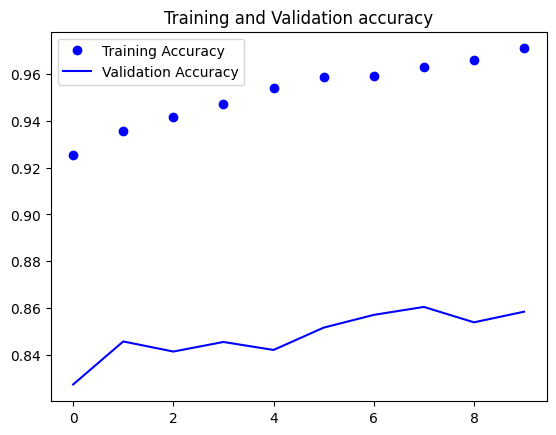

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


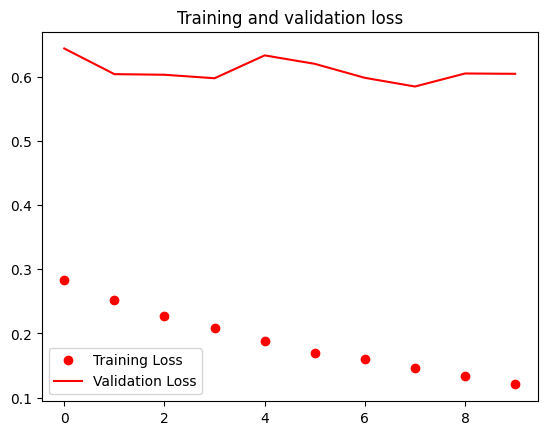

In [ ]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
#get the predictions for the test data
predicted_class = cnn_model.predict(X_test_gray_norm)
predicted_classes = np.argmax(predicted_class, axis=1)

#get the indices to be plotted
y_true = y_test

395/395 [==============================] - 5s 13ms/step


In [ ]:
predicted_classes

array([16,  1, 38, ...,  1,  7,  4])

In [ ]:
y_true.shape

(12630,)

In [ ]:
predicted_classes.shape

(12630,)

<Axes: >

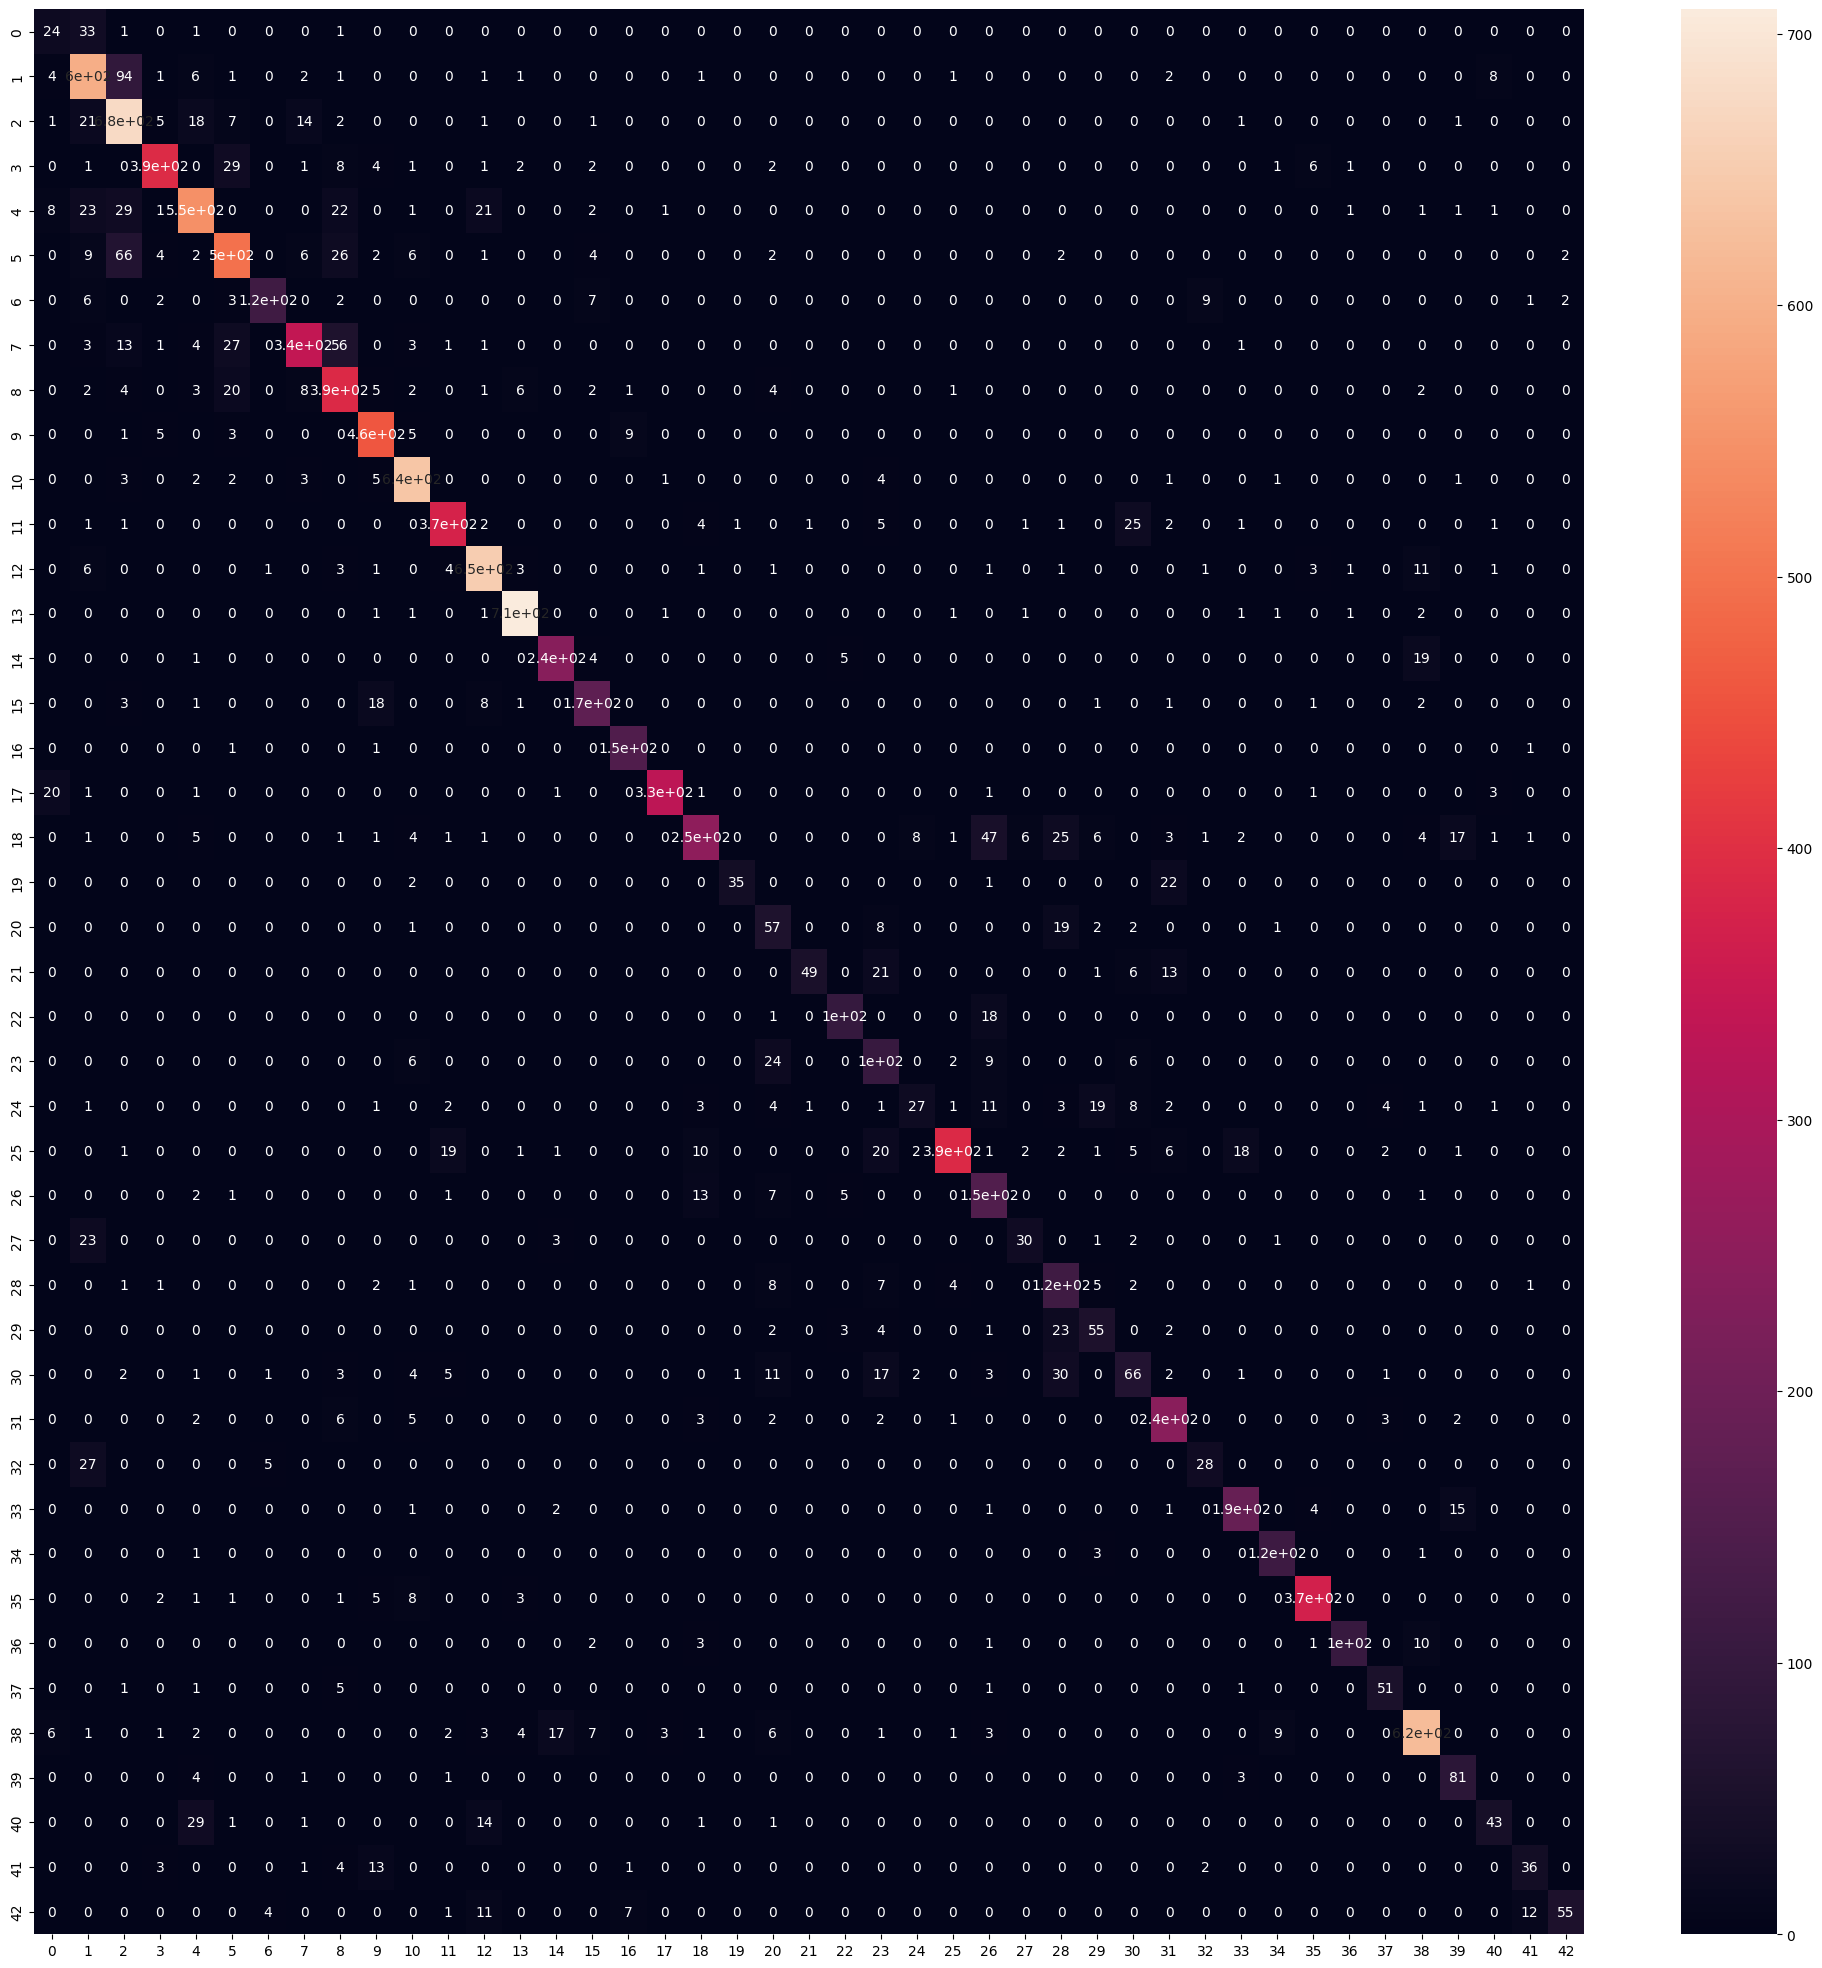

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

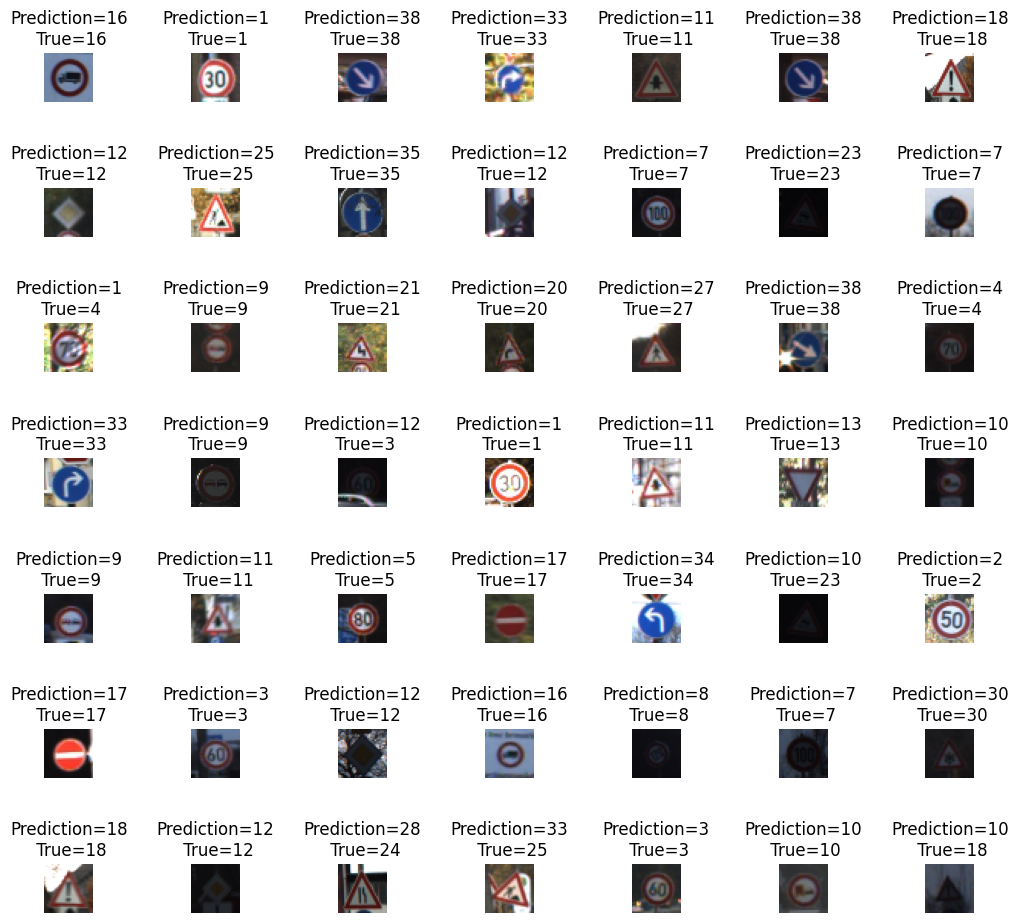

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() #
for i in np.arange(0, L * W):
  axes[i].imshow(X_test[i])
  axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i],y_true[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=2)
